In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt 

In [23]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

In [24]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [25]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [26]:
#define html variable 
html = browser.html
html_soup = soup(html, 'html.parser')

In [27]:
#find table headers
t_headers = html_soup.find_all('th')

In [28]:
#extract headers
header_list = []

for row in t_headers: 
    header = row.text.strip()
    header_list.append(header)

In [29]:
t_records = html_soup.find_all('tr', class_='data-row')

In [30]:
#count number of headers 
header_count = range(len(header_list))

In [31]:
#extract data from each row
result_dict = {}

#lists
record_values = []
result_list = [] 

for record in t_records: #loop through rows 
    record_values = record.find_all('td')
    for i in header_count: #loop through columns and match to headers 
        result_dict[header_list[i]]=record_values[i].text.strip()
    result_list.append(result_dict.copy())

In [32]:
result_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [33]:
#create dataframe
results_df = pd.DataFrame(result_list)

results_df 

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [34]:
#check column types 
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [35]:
#convert data
converted_df = results_df.astype({"id": int, "terrestrial_date": object, "sol": int, "ls": int, "month": int, "min_temp": float, "pressure": float})

In [36]:
#change type to date/time
converted_df["con_date"] = pd.to_datetime(converted_df["terrestrial_date"])

In [37]:
#drop original ter_date field 
final_df = converted_df.drop('terrestrial_date', axis=1)

In [38]:
#reorder columns 
order_df = final_df.loc[:, ['id', 'con_date', 'sol', 'ls', 'month', 'min_temp',  'pressure']]

In [39]:
#rename columns 
mars_df = order_df.rename(columns={'con_date': 'terrestrial_date'}, errors="raise")
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [44]:
#Answer the question:How many months are there on mars?
#24 months

In [45]:
#Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
#1967 days

In [46]:
#Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?

#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

temps = mars_df[['month', 'min_temp']]
temps

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0
...,...,...
1862,5,-78.0
1863,5,-77.0
1864,5,-76.0
1865,5,-77.0


In [47]:
temp_count = temps.groupby(['month']).mean('min_temp')

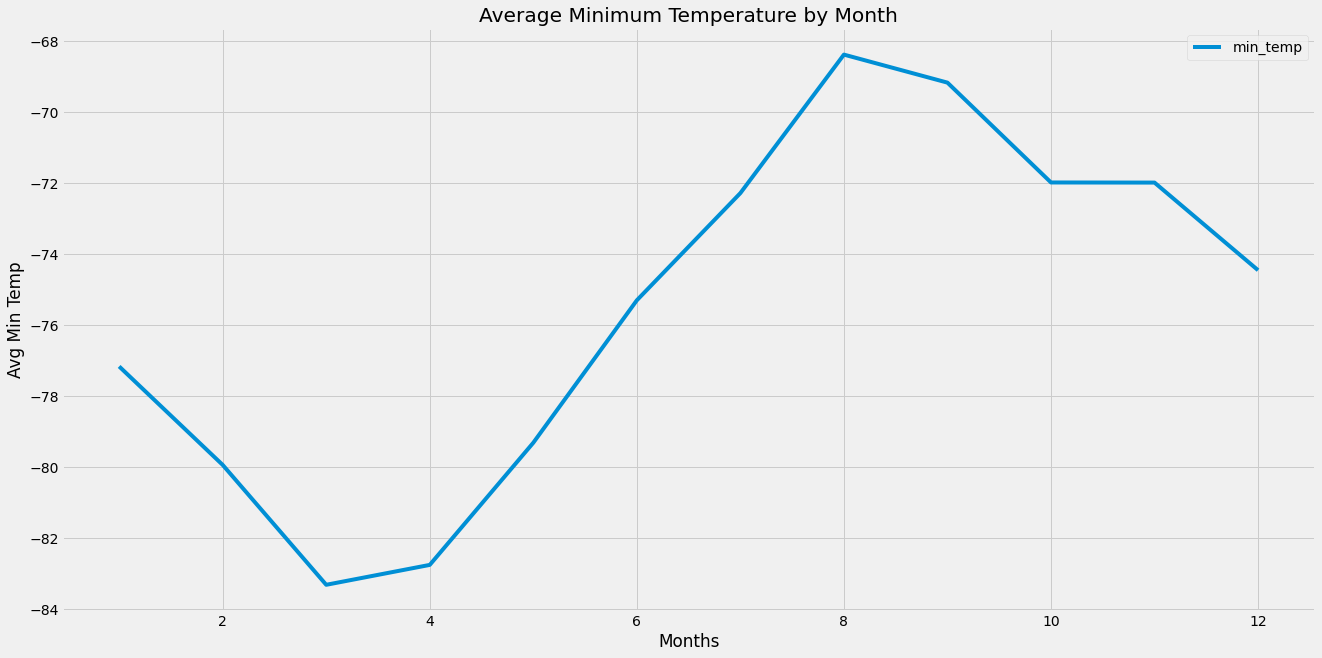

<Figure size 432x288 with 0 Axes>

In [48]:
from matplotlib import style
style.use('fivethirtyeight')


temp_plot = temp_count.plot(figsize = (20,10))

temp_plot.set_title("Average Minimum Temperature by Month")

temp_plot.set_xlabel("Months")

temp_plot.set_ylabel("Avg Min Temp")


plt.show()
plt.tight_layout()

In [49]:
#The coldest month is the 3rd month and the warmest is the 8th month. 

In [50]:
#Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
#Get the answer by averaging the daily atmospheric pressure of all the months.
#Plot the results as a bar chart.

In [51]:
#create a sub dataset with columns month and pressure 
pressure = mars_df[['month', 'pressure']]

In [52]:
#group and calculate average of pressures
pressure_count = pressure.groupby(['month']).mean('pressure')

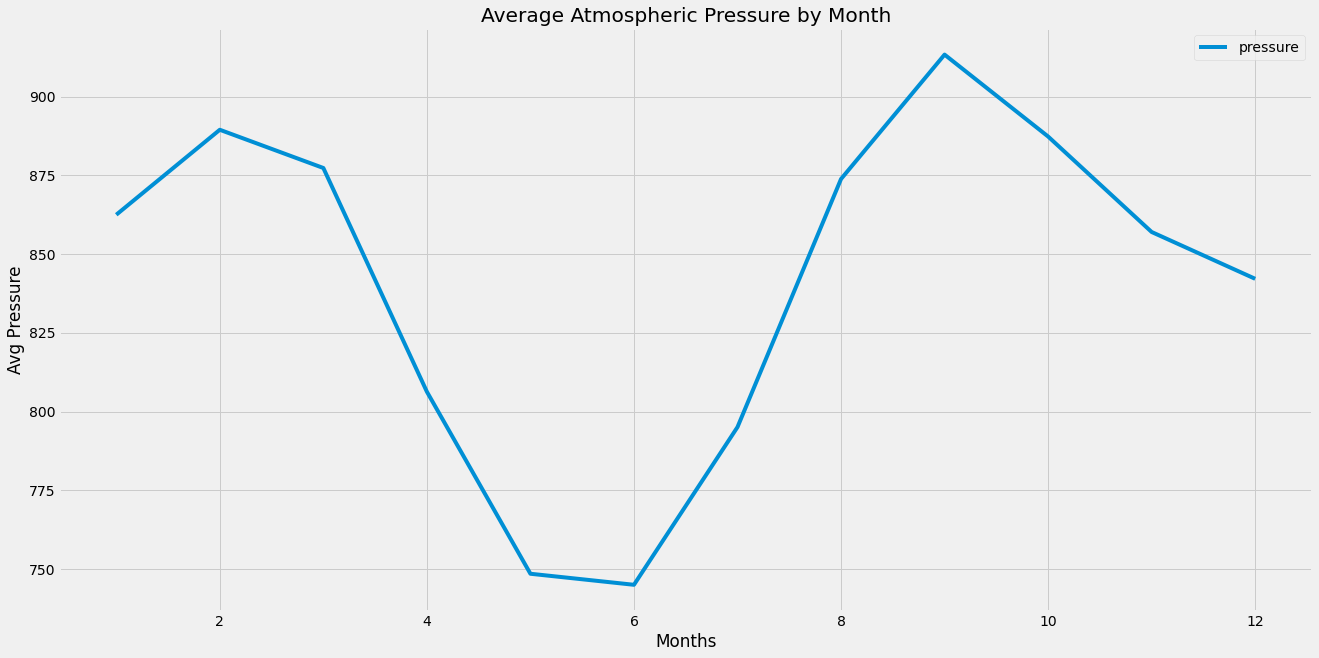

<Figure size 432x288 with 0 Axes>

In [53]:
#generate plot of average pressure by month 

from matplotlib import style
style.use('fivethirtyeight')


temp_plot = pressure_count.plot(figsize = (20,10))

temp_plot.set_title("Average Atmospheric Pressure by Month")

temp_plot.set_xlabel("Months")

temp_plot.set_ylabel("Avg Pressure")


plt.show()
plt.tight_layout()

In [54]:
#Answer: The 9th month has the highest pressure and the 6th month has the lowest pressure. 

In [55]:
#Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#Visually estimate the result by plotting the daily minimum temperature.

In [56]:
#establish a dataframe containing the min_temps. 
day_count = mars_df[['min_temp']]

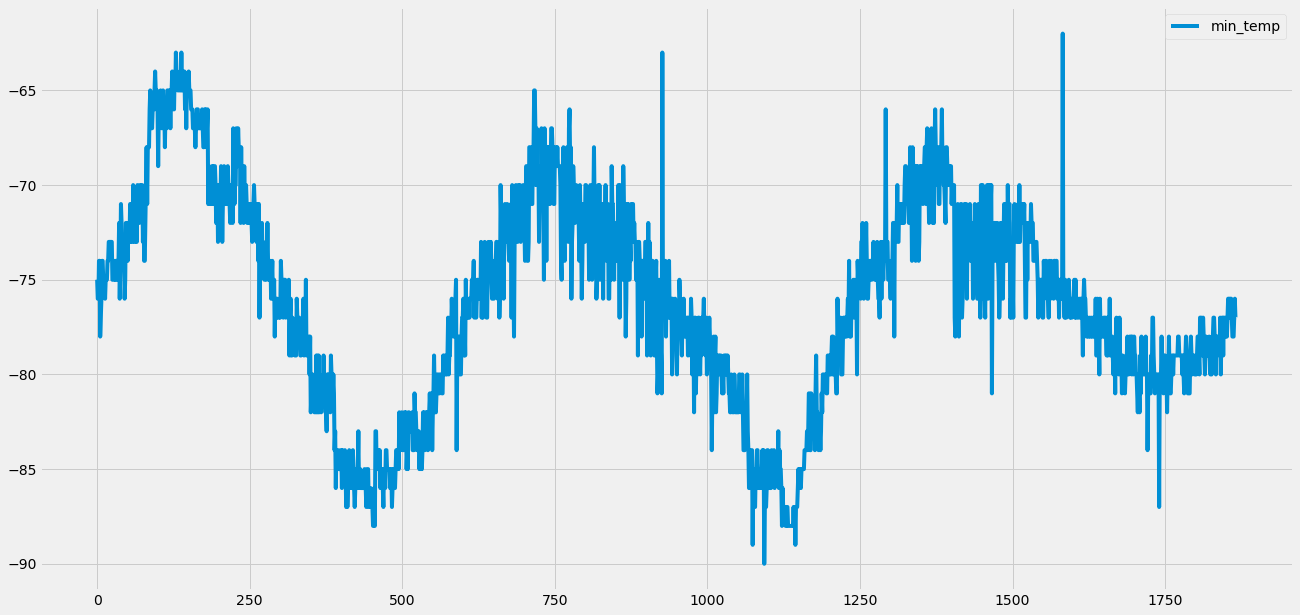

<Figure size 432x288 with 0 Axes>

In [57]:
#generate plot of minimum temperatures by month 


from matplotlib import style
style.use('fivethirtyeight')


day_plot = day_count.plot(figsize = (20,10))

temp_plot.set_title("Earth Days to Mars Year")

temp_plot.set_xlabel("terrestrial_date")

temp_plot.set_ylabel("min_temp")


plt.show()
plt.tight_layout()

In [58]:
#Answer: The time it takes mars to circle the sun once is approximatly 650 days. 
#However when I googled this to check my answer it shows that it actually takes 687 days for mars to orbit the sun. 

In [66]:
# Export the City_Data into a CSV.

mars_data_export = "mars_data.csv"
mars_df.to_csv(mars_data_export, index=False)